In [234]:
!pip install fredapi
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install python-dotenv
!pip install seaborn
!pip install statsmodels
!pip install yfinance


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [235]:
# Load the environment variables

from dotenv import load_dotenv
import os

load_dotenv()

FRED_API_KEY = os.getenv("FRED_API_KEY")

In [236]:
# Define ETFs
etfs = {"AGG", "SPSB", "XBB"}

# Define start and end dates
start_date = "2023-01-01"
end_date = "2024-11-01"

In [237]:
# Get ETF price data

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import numpy as np

# Define dictionary to store ETF data
etf_data = {}

for etf in etfs:
    etf_data[etf] = yf.download(etf, start=start_date, end=end_date)['Close']

etf_data_df = pd.concat(etf_data.values(), axis=1, keys=etf_data.keys())

# Remove ticker row
etf_data_df.columns = etf_data_df.columns.droplevel(1)

print(etf_data_df.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                                SPSB        XBB        AGG
Date                                                      
2023-01-03 00:00:00+00:00  29.400000  38.626999  97.559998
2023-01-04 00:00:00+00:00  29.410000  39.069000  98.099998
2023-01-05 00:00:00+00:00  29.370001  38.980000  98.019997
2023-01-06 00:00:00+00:00  29.500000  39.439999  99.089996
2023-01-09 00:00:00+00:00  29.520000  39.560001  99.339996


In [238]:
# Define indicators and FRED series IDs

indicators = {
    "Unemployment Rate": "UNRATE",
    "Inflation": "CPIAUCNS",
    "Real GPD": "GDPC1",
    "Nominal GDP": "GDP",
    "10-Year Treasury Constant Maturity Rate": "GS10",
    "Federal Funds Rate": "FEDFUNDS",
    }

In [239]:
from fredapi import Fred
import pandas as pd

# Inittialize Fred API client
fred = Fred(api_key=FRED_API_KEY)

# Define dictionary to store indicator data
indicator_data = {}

# Fetch each indicator
for indicator_name, fred_code in indicators.items():
    # Fetch data from FRED
    series = fred.get_series(fred_code, start_date, end_date)
    indicator_data[indicator_name] = series

In [240]:
# Convert the dictionary to a DataFrame
indicator_data_df = pd.DataFrame(indicator_data)
print(indicator_data_df.head())

            Unemployment Rate  Inflation   Real GPD  Nominal GDP  \
2023-01-01                3.4    299.170  22403.435    27164.359   
2023-02-01                3.6    300.840        NaN          NaN   
2023-03-01                3.5    301.836        NaN          NaN   
2023-04-01                3.4    303.363  22539.418    27453.815   
2023-05-01                3.7    304.127        NaN          NaN   

            10-Year Treasury Constant Maturity Rate  Federal Funds Rate  
2023-01-01                                     3.53                4.33  
2023-02-01                                     3.75                4.57  
2023-03-01                                     3.66                4.65  
2023-04-01                                     3.46                4.83  
2023-05-01                                     3.57                5.06  


In [241]:
# Ensure both DataFrames have timezone-naive DatetimeIndex 
etf_data_df.index = etf_data_df.index.tz_localize(None)
indicator_data_df.index = indicator_data_df.index.tz_localize(None)

In [242]:
# Combine the ETF and indicator data
combined_data_df = pd.concat([etf_data_df, indicator_data_df], axis=1)
combined_data_df.ffill(inplace=True)
print(combined_data_df.head())

                 SPSB        XBB        AGG  Unemployment Rate  Inflation  \
2023-01-01        NaN        NaN        NaN                3.4     299.17   
2023-01-03  29.400000  38.626999  97.559998                3.4     299.17   
2023-01-04  29.410000  39.069000  98.099998                3.4     299.17   
2023-01-05  29.370001  38.980000  98.019997                3.4     299.17   
2023-01-06  29.500000  39.439999  99.089996                3.4     299.17   

             Real GPD  Nominal GDP  10-Year Treasury Constant Maturity Rate  \
2023-01-01  22403.435    27164.359                                     3.53   
2023-01-03  22403.435    27164.359                                     3.53   
2023-01-04  22403.435    27164.359                                     3.53   
2023-01-05  22403.435    27164.359                                     3.53   
2023-01-06  22403.435    27164.359                                     3.53   

            Federal Funds Rate  
2023-01-01                4.3

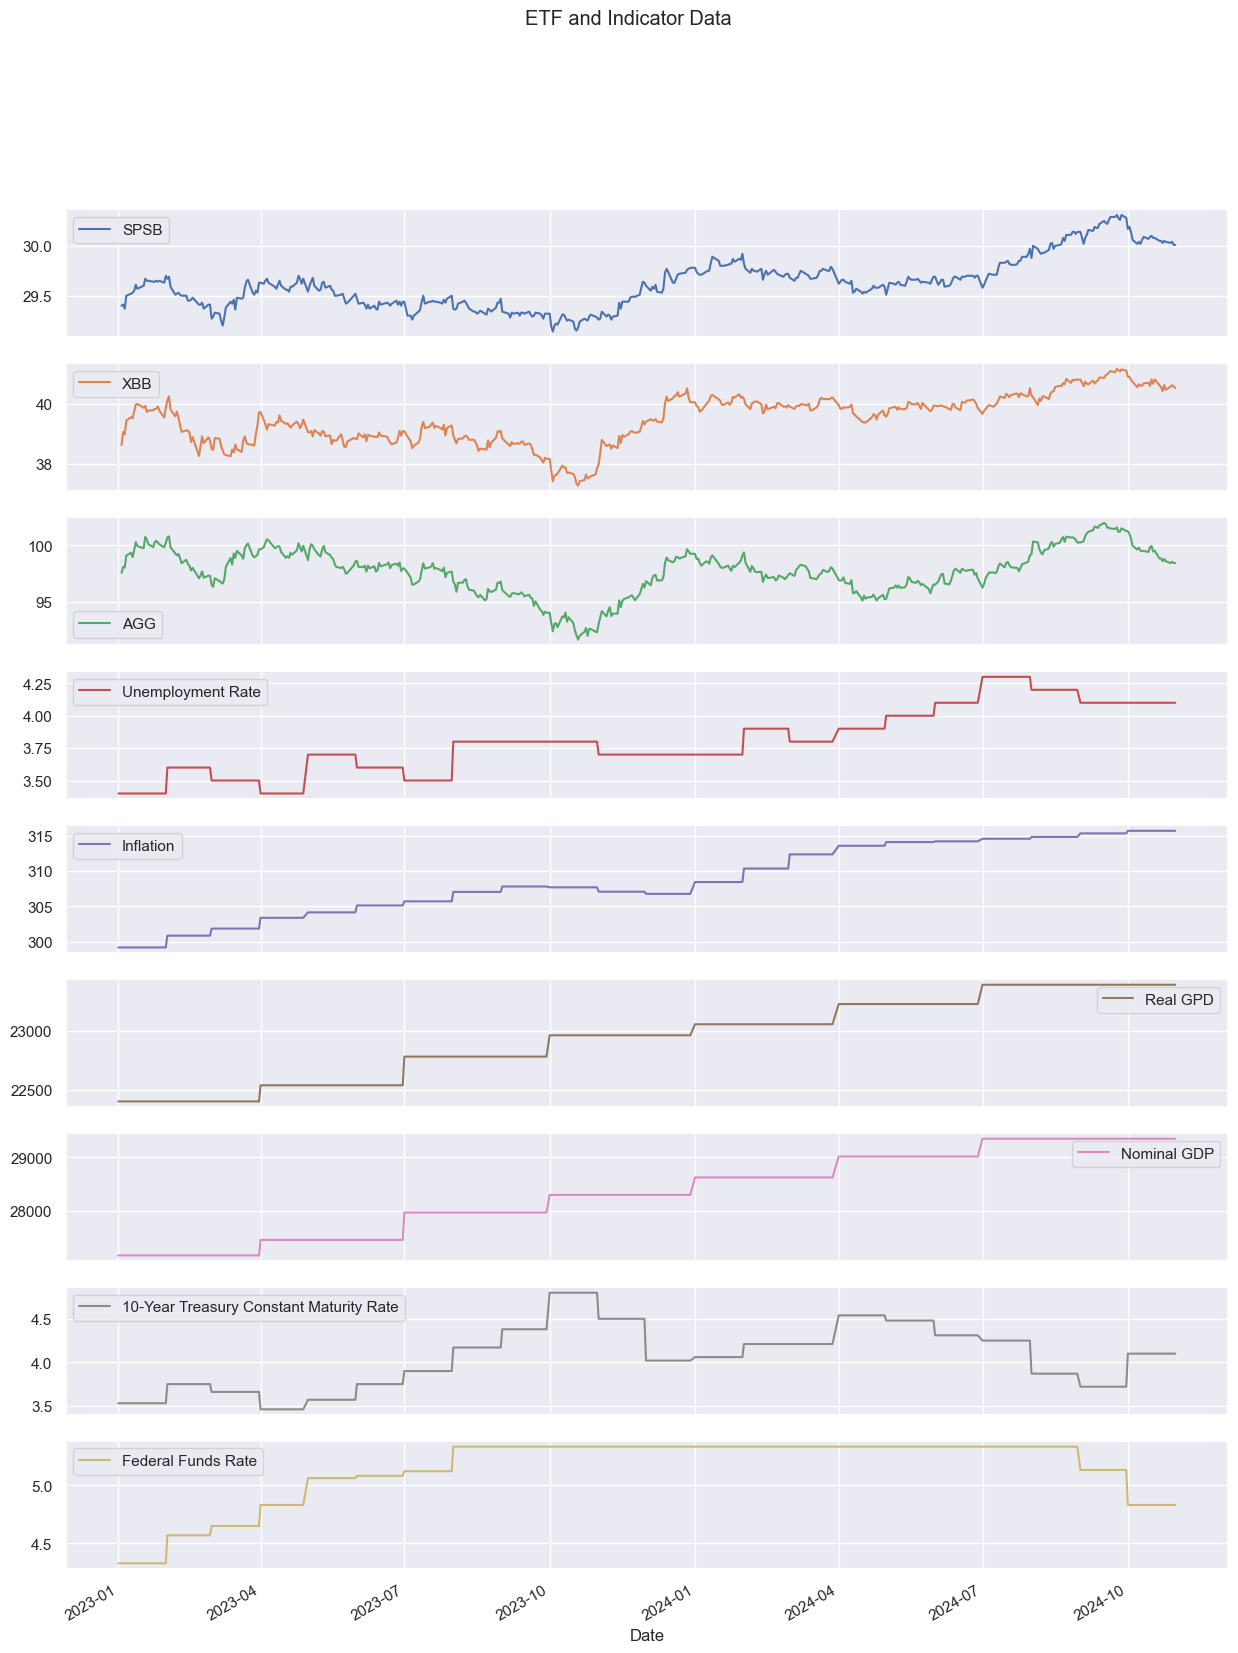

In [243]:
# Plot the data
combined_data_df.plot(subplots=True, figsize=(15, 20))

# Set title for entire plot
plt.suptitle("ETF and Indicator Data")
plt.xlabel("Date")
plt.savefig(f"etf_and_indicator_data_{start_date}_{end_date}.png")
plt.show()

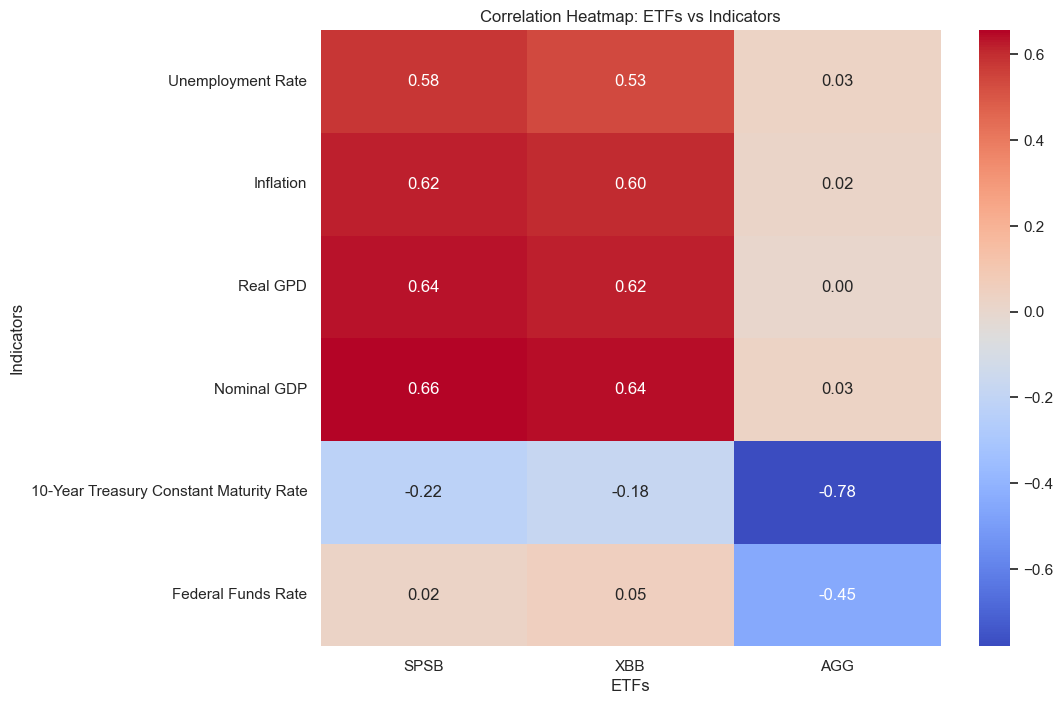

In [244]:
# Calculate correlation matrix and plot heatmap

correlation_matrix = combined_data_df.corr()
etf_indicator_corr = correlation_matrix.loc[indicators.keys(), list(etfs)]

import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(etf_indicator_corr, annot=True, fmt=".2f", cmap="coolwarm")

# Add titles and labels
plt.title("Correlation Heatmap: ETFs vs Indicators")
plt.xlabel("ETFs")
plt.ylabel("Indicators")
plt.savefig(f"etf_and_indicator_correlation_{start_date}_{end_date}.png")
plt.show()

In [245]:
etf_data_df.ffill()
indicator_data_df.ffill()

,Unemployment Rate,Inflation,Real GPD,Nominal GDP,10-Year Treasury Constant Maturity Rate,Federal Funds Rate
2023-01-01,3.4,299.170,22403.435,27164.359,3.53,4.33
2023-02-01,3.6,300.840,22403.435,27164.359,3.75,4.57
2023-03-01,3.5,301.836,22403.435,27164.359,3.66,4.65
2023-04-01,3.4,303.363,22539.418,27453.815,3.46,4.83
2023-05-01,3.7,304.127,22539.418,27453.815,3.57,5.06
2023-06-01,3.6,305.109,22539.418,27453.815,3.75,5.08
2023-07-01,3.5,305.691,22780.933,27967.697,3.90,5.12
2023-08-01,3.8,307.026,22780.933,27967.697,4.17,5.33
2023-09-01,3.8,307.789,22780.933,27967.697,4.38,5.33
2023-10-01,3.8,307.671,22960.600,28296.967,4.80,5.33


In [246]:
# Compute percentage changes for ETFs (daily returns)
etf_returns = etf_data_df.pct_change()

# Compute percentage changes for indicators
indicator_changes = indicator_data_df.pct_change()

# Drop missing values caused by initial `pct_change()`
etf_returns.dropna(inplace=True)
indicator_changes.dropna(inplace=True)

/var/folders/s4/p2sv90k53n135vfj42nsllnc0000gn/T/ipykernel_78006/618843541.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  indicator_changes = indicator_data_df.pct_change()


In [247]:
print(etf_returns.head())
print(indicator_changes.head())

                SPSB       XBB       AGG
Date                                    
2023-01-04  0.000340  0.011443  0.005535
2023-01-05 -0.001360 -0.002278 -0.000816
2023-01-06  0.004426  0.011801  0.010916
2023-01-09  0.000678  0.003043  0.002523
2023-01-10  0.000339 -0.001011 -0.003825
            Unemployment Rate  Inflation  Real GPD  Nominal GDP  \
2023-02-01           0.058824   0.005582   0.00000     0.000000   
2023-03-01          -0.027778   0.003311   0.00000     0.000000   
2023-04-01          -0.028571   0.005059   0.00607     0.010656   
2023-05-01           0.088235   0.002518   0.00000     0.000000   
2023-06-01          -0.027027   0.003229   0.00000     0.000000   

            10-Year Treasury Constant Maturity Rate  Federal Funds Rate  
2023-02-01                                 0.062323            0.055427  
2023-03-01                                -0.024000            0.017505  
2023-04-01                                -0.054645            0.038710  
2023-05-01    

In [248]:
# Align ETF returns and indicator changes by their indices
aligned_data = pd.concat([etf_returns, indicator_changes], axis=1).dropna()

# Split into ETF returns and indicators
aligned_etf_returns = aligned_data[etf_data_df.columns]
aligned_indicator_changes = aligned_data[indicator_data_df.columns]

In [249]:
import statsmodels.api as sm

# Store sensitivities in a dictionary
sensitivity_results = {}

# Loop over ETFs and indicators to compute regression coefficients
for etf in aligned_etf_returns.columns:
    for indicator in aligned_indicator_changes.columns:
        # Prepare data for regression
        X = aligned_indicator_changes[indicator]
        y = aligned_etf_returns[etf]

        # Add constant for intercept
        X = sm.add_constant(X)

        # Fit regression model
        model = sm.OLS(y, X).fit()

        # Store the sensitivity (slope)
        sensitivity_results[(etf, indicator)] = model.params[indicator]

# Convert the results to a DataFrame
sensitivity_df = pd.DataFrame(sensitivity_results, index=["Sensitivity"]).T
sensitivity_df.reset_index(inplace=True)
sensitivity_df.columns = ["ETF", "Indicator", "Sensitivity"]

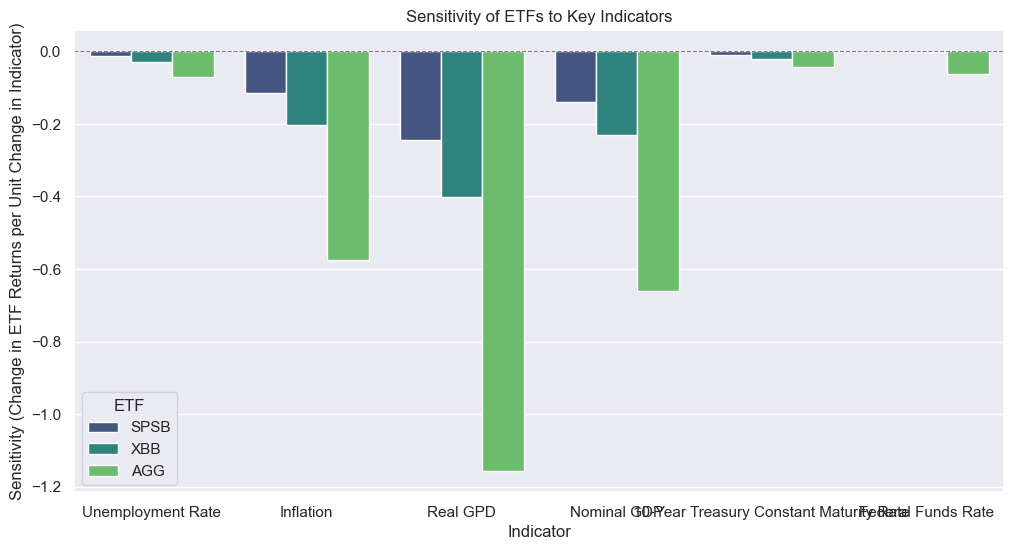

In [250]:
# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=sensitivity_df,
    x="Indicator",
    y="Sensitivity",
    hue="ETF",
    palette="viridis"
)
plt.title("Sensitivity of ETFs to Key Indicators")
plt.ylabel("Sensitivity (Change in ETF Returns per Unit Change in Indicator)")
plt.xlabel("Indicator")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend(title="ETF")
plt.savefig(f"etf_sensitivity_to_indicators_{start_date}_{end_date}.png")
plt.show()

In [251]:
# ALL THE CODE BELOW IS OLD AND FOR REFERENCE ONLY

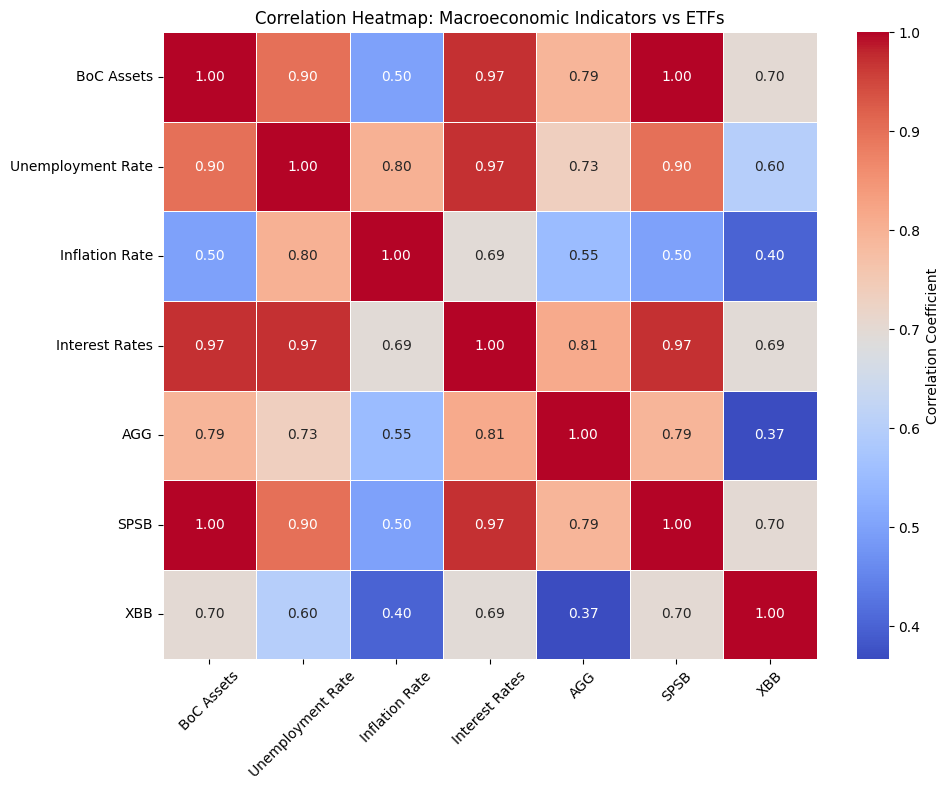

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace with actual data)
data = {
    "BoC Assets": [1.2, 1.3, 1.4, 1.6, 1.5],
    "Unemployment Rate": [5.0, 5.1, 5.3, 5.4, 5.2],
    "Inflation Rate": [2.1, 2.3, 2.5, 2.4, 2.2],
    "Interest Rates": [1.5, 1.6, 1.7, 1.8, 1.7],
    "AGG": [100.5, 101.0, 100.8, 101.2, 100.9],
    "SPSB": [50.1, 50.2, 50.3, 50.5, 50.4],
    "XBB": [28.0, 28.1, 28.3, 28.2, 28.4],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate correlations
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title("Correlation Heatmap: Macroeconomic Indicators vs ETFs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("correlation_heatmap_all_indicators_and_etfs.png")
plt.show()


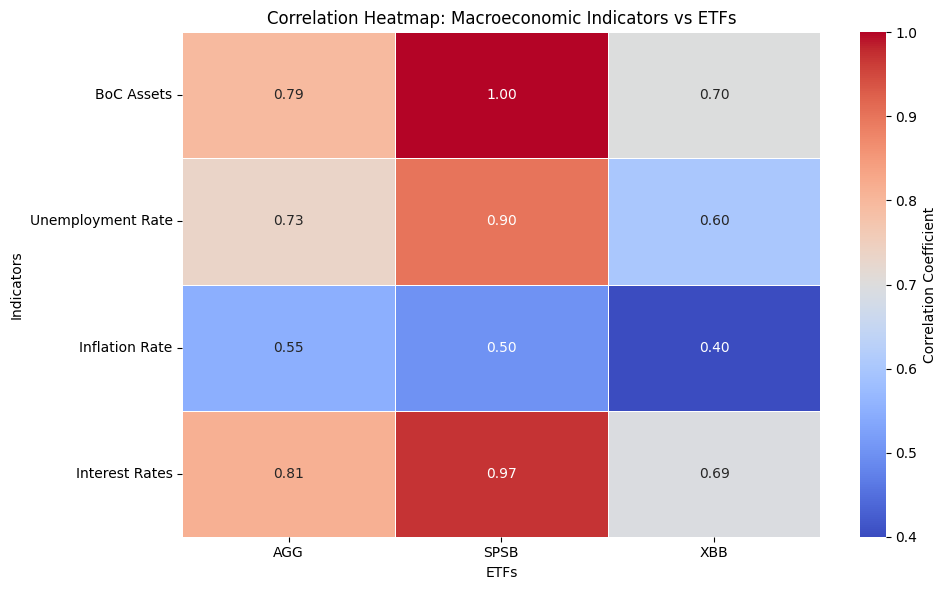

In [7]:
# Split ETFs and indicators into separate axes
etfs = df[["AGG", "SPSB", "XBB"]]
indicators = df[["BoC Assets", "Unemployment Rate", "Inflation Rate", "Interest Rates"]]

# Calculate pairwise correlations between each indicator and each ETF
correlation_df = pd.DataFrame(
    {etf: [indicators[col].corr(etfs[etf]) for col in indicators.columns] for etf in etfs.columns},
    index=indicators.columns,
)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_df,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title("Correlation Heatmap: Macroeconomic Indicators vs ETFs")
plt.xlabel("ETFs")
plt.ylabel("Indicators")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("correlation_heatmap_indicators_vs_etfs_only.png")
plt.show()

In [8]:
import yfinance as yf
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from dotenv import load_dotenv
import os

# Load API keys from .env file
load_dotenv()

# Set API Key for FRED
fred = Fred(api_key=os.getenv("FRED_API_KEY"))

# Define date range (last 30 days)
end_date = datetime.today()
start_date = end_date - timedelta(days=365)

# Fetch ETF prices from Yahoo Finance
etf_symbols = ["AGG", "SPSB", "XBB.TO"]  # Example symbols
etf_data_list = []  # To store individual ETF DataFrames

for symbol in etf_symbols:
    try:
        # Download historical data
        data = yf.download(symbol, start=start_date, end=end_date)
        if not data.empty:
            # Add a column for this ETF's "Close" prices
            data = data[["Close"]].rename(columns={"Close": symbol})
            etf_data_list.append(data)
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")

# Combine all ETFs into a single DataFrame
if etf_data_list:
    etf_prices = pd.concat(etf_data_list, axis=1)  # Align on index (dates)
else:
    raise ValueError("No ETF data was fetched successfully.")

# Ensure the index is date-aligned and properly formatted
etf_prices.index = pd.to_datetime(etf_prices.index)

# Fetch macroeconomic indicators from FRED
indicators = {
    "BoC_Assets": "RRPONTSYD",  # Replace with actual FRED code for Bank of Canada assets
    "Unemployment_Rate": "UNRATE",  # U.S. Unemployment Rate
    "Inflation_Rate": "FPCPITOTLZGUSA",  # Inflation Rate (CPI)
    "Interest_Rates": "FEDFUNDS"  # Federal Funds Rate
}
indicator_data = {}

for name, code in indicators.items():
    try:
        series = fred.get_series(code, start_date, end_date)
        if not series.empty:
            indicator_data[name] = series
    except Exception as e:
        print(f"Error fetching indicator {name}: {e}")

# Convert macroeconomic indicators into a DataFrame
if indicator_data:
    indicator_df = pd.DataFrame(indicator_data)
else:
    raise ValueError("No indicator data was fetched successfully.")

print(indicator_df.head(365))

# Align both datasets on dates
etf_prices.index = etf_prices.index.date
indicator_df.index = indicator_df.index.date
combined_df = etf_prices.join(indicator_df, how="outer").dropna()

# Calculate correlations between ETFs and indicators
correlation_df = pd.DataFrame(
    {etf: [indicator_df[ind].corr(etf_prices[etf]) for ind in indicator_df.columns] for etf in etf_prices.columns},
    index=indicator_df.columns,
)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_df,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title("Correlation Heatmap: Indicators vs ETFs")
plt.xlabel("ETFs")
plt.ylabel("Indicators")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Display combined data
print(combined_df.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


            BoC_Assets  Unemployment_Rate  Inflation_Rate  Interest_Rates
2023-01-01         NaN                NaN        4.116338             NaN
2023-11-01         NaN                3.7             NaN            5.33
2023-11-16     912.010                NaN             NaN             NaN
2023-11-17     935.803                NaN             NaN             NaN
2023-11-20     953.088                NaN             NaN             NaN
...                ...                ...             ...             ...
2024-11-11         NaN                NaN             NaN             NaN
2024-11-12     178.814                NaN             NaN             NaN
2024-11-13     238.106                NaN             NaN             NaN
2024-11-14     214.509                NaN             NaN             NaN
2024-11-15     172.400                NaN             NaN             NaN

[266 rows x 4 columns]


MergeError: Not allowed to merge between different levels. (2 levels on the left, 1 on the right)